Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [1]:
import requests
from IPython.display import JSON

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sqlite3
from sqlite3 import Error

### I have joined the data and converted it into a csv in Part 2. Loading the data from csv.

In [3]:
df_fs = pd.read_csv("fsrestaurant_info.csv")
df_fs

,Unnamed: 0,name,popularity,price,rating,categories_name,latitude,longitude,distance,credit_card,beer,outdoor_seating
0,0,Rorschach Brewing,0.982673,2.0,8.5,Brewery,43.663542,-79.319882,194,True,True,True
1,1,The Sidekick,0.928866,NaN,8.8,Coffee Shop,43.664580,-79.324956,440,NaN,NaN,NaN
2,2,O Sushi,0.933508,2.0,7.9,Pizzeria,43.666623,-79.316861,300,NaN,NaN,NaN
3,3,Hasting Snack Bar,0.924879,1.0,9.0,Lounge,43.663791,-79.328899,759,True,NaN,NaN
4,4,Chino Locos,0.924573,1.0,8.2,Chinese Restaurant,43.664540,-79.325510,470,True,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...
4516,15,Martino Pizza Inc,0.845720,1.0,6.3,Pizzeria,43.675732,-79.403612,905,True,NaN,False
4517,16,The Backyard Smokehouse,0.911745,2.0,NaN,BBQ Joint,43.675044,-79.406737,647,NaN,NaN,NaN
4518,17,The Grand Elvis,0.813838,2.0,NaN,American Restaurant,43.675723,-79.403658,902,NaN,NaN,NaN
4519,18,A&W Restaurant,0.947141,1.0,NaN,American Restaurant,43.683021,-79.417976,988,NaN,NaN,NaN


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [4]:
# using this function, we can find out to see if we have any values that doesn't make any sense.
df_fs.describe()

,Unnamed: 0,popularity,price,rating,latitude,longitude,distance
count,4521.000000,4269.000000,3973.000000,3580.000000,4521.000000,4521.000000,4.521000e+03
mean,23.107941,0.926204,1.742009,7.723184,43.660088,-79.392228,1.263367e+03
std,14.098259,0.106406,0.727907,0.895791,0.014370,0.038557,4.179730e+04
min,0.000000,0.000262,1.000000,4.600000,43.629265,-79.476965,1.000000e+01
25%,11.000000,0.923256,1.000000,7.200000,43.648776,-79.417388,4.500000e+02
50%,23.000000,0.947920,2.000000,7.900000,43.658604,-79.393332,6.740000e+02
75%,35.000000,0.968785,2.000000,8.400000,43.669353,-79.379508,8.570000e+02
max,49.000000,0.999900,4.000000,9.400000,43.716985,-79.279413,2.810971e+06


In [5]:
df_fs.isnull().sum()

Unnamed: 0            0
name                  0
popularity          252
price               548
rating              941
categories_name       0
latitude              0
longitude             0
distance              0
credit_card        1743
beer               3399
outdoor_seating    1749
dtype: int64

In [6]:
# dropping the id's
df_fs.drop(['Unnamed: 0'], axis=1, inplace = True)


In [7]:
# Dropping duplicates
df_fs.drop_duplicates(subset=['name', 'latitude', 'longitude'], keep='first', inplace = True)

In [8]:
df_fs.describe()

,popularity,price,rating,latitude,longitude,distance
count,1346.000000,1252.000000,1000.000000,1520.000000,1520.000000,1.520000e+03
mean,0.900788,1.692492,7.496700,43.663671,-79.390181,2.517101e+03
std,0.140015,0.714478,0.991424,0.017597,0.044766,7.208321e+04
min,0.000262,1.000000,4.600000,43.629265,-79.476965,2.300000e+01
25%,0.898890,1.000000,6.775000,43.649627,-79.421799,4.900000e+02
50%,0.937947,2.000000,7.700000,43.662954,-79.396233,7.130000e+02
75%,0.959861,2.000000,8.300000,43.674436,-79.362602,8.650000e+02
max,0.999900,4.000000,9.400000,43.716985,-79.279413,2.810971e+06


There were 3181 duplicates removed.

<AxesSubplot:xlabel='popularity', ylabel='distance'>

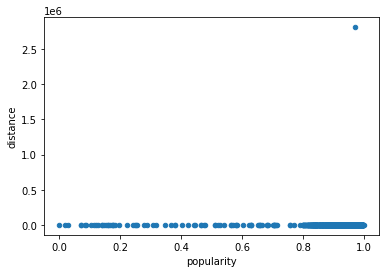

In [9]:
df_fs.plot(x='popularity', y='distance', kind='scatter')
# We have an outlier in this graph

In [10]:
upper = df_fs['distance'] >= 1200
print(df_fs[upper])

                        name  popularity  price  rating  \
1408  Good Earth Coffeehouse    0.971751    1.0     8.1   
2913         Black Oaks Cafe    0.800061    1.0     NaN   
2978    Glory Hole Doughnuts    0.906972    1.0     8.3   
4231     Mother Cocktail Bar    0.870316    3.0     7.3   

             categories_name   latitude  longitude  distance credit_card beer  \
1408  Arts and Entertainment  43.700042 -79.399820   2810971         NaN  NaN   
2913                   Diner  43.645126 -79.456083      1928         NaN  NaN   
2978                  Bakery  43.639808 -79.441300      4341        True  NaN   
4231            Cocktail Bar  43.645243 -79.414499      1236         NaN  NaN   

     outdoor_seating  
1408             NaN  
2913             NaN  
2978           False  
4231             NaN  


<AxesSubplot:xlabel='distance', ylabel='popularity'>

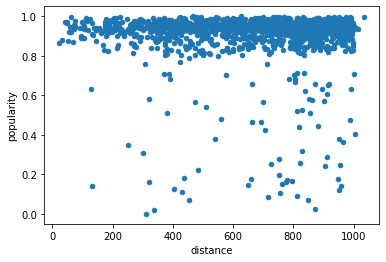

In [11]:
df_fs.drop(index=[1408,2913,2978,4231], inplace = True)
df_fs.plot(x='distance', y='popularity', kind='scatter')

<AxesSubplot:xlabel='rating', ylabel='popularity'>

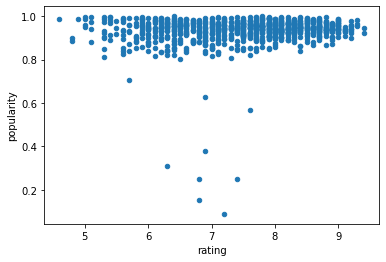

In [12]:
df_fs.plot(x='rating', y='popularity', kind='scatter')

(array([  8.,  22.,  62., 118.,  86., 128., 198., 195., 135.,  45.]),
 array([4.6 , 5.08, 5.56, 6.04, 6.52, 7.  , 7.48, 7.96, 8.44, 8.92, 9.4 ]),
 <BarContainer object of 10 artists>)

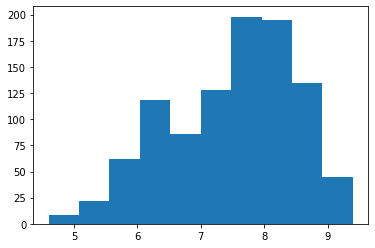

In [13]:
plt.hist(df_fs['rating'],bins=10)

(array([542.,   0.,   0., 573.,   0.,   0., 107.,   0.,   0.,  26.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

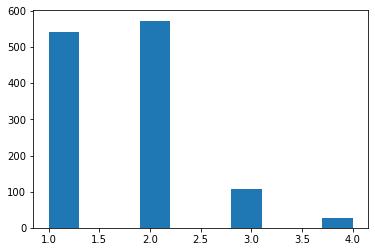

In [14]:
plt.hist(df_fs['price'],bins=10)

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

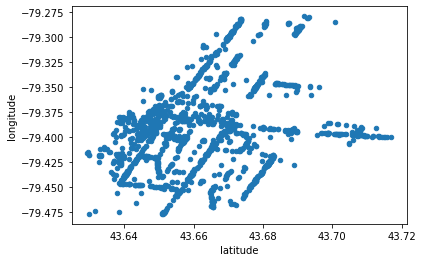

In [15]:
df_fs.plot(x='latitude', y='longitude', kind='scatter')

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [16]:
def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

In [17]:
conn = create_connection("sm_app.sqlite")

Connection to SQLite DB successful


In [18]:
restaurant_table = """
CREATE TABLE IF NOT EXISTS users (
  id INTEGER PRIMARY KEY AUTOINCREMENT,
  name TEXT NOT NULL,
  popularity FLOAT,
  price FLOAT,
  rating FLOAT,
  categories_name TEXT,
  latitude FLOAT NOT NULL,
  longitude FLOAT NOT NULL,
  distance INTEGER NOT NULL,
  credit_card BOOL,
  beer BOOL,
  outdoor_seating BOOL
);
"""
conn.execute(restaurant_table)

In [19]:
table_name = "restaurant"
df_fs.to_sql(table_name,conn,if_exists='replace',index=False)
conn.commit()
conn.close()

Look at the data before and after the join to validate your data.

In [20]:
connection = sqlite3.connect("sm_app.sqlite")
crsr = connection.cursor()
crsr.execute("SELECT COUNT(*) FROM restaurant")

In [21]:
restaurant_sql = crsr.fetchall()

In [27]:
# Number of restaurants in SQLite
print(restaurant_sql[0][0])

1516


In [24]:
# Number of
print(len(df_fs))

1516
